## sklearn Basic API

estmator.fit(X, [y])  # training

estimator.predict: 
- Classification, 
- Regression, 
- Clustering

estimator.transfomr: 
- Preprocessing, 
- Dimensionality reduction, 
- Feature selection, 
- Feature extraction

## cross-validation
모든 파라미터를 일일이 적용해 볼 수 없으니, 데이터를 여러개로 folding하여 
파라미러를 데이터 별로 다르게, 또한 test 데이터 역시 매번 다른 데이터 셋으로 하여서 진행
예시)
split1: training; Fold2~5, test; Fold1
split2: training: Fold1,3~4, test: Fold2

어떤 조합이 가장 최적인지,
또한 어떤 파라미터가 최적인지 확인하는 과정

In [4]:
from sklearn import tree

X = [[0,0], [1,1]]
Y=[0,1]
clf = tree.DecisionTreeClassifier()
# 학습
clf = clf.fit(X,Y)
clf

DecisionTreeClassifier()

In [9]:
test= [[2.,2.]]
clf.predict(test)

array([1])

In [13]:
clf.predict_proba(test)  # predict_proba는 확률로 결과를 출력함

array([[0., 1.]])

In [14]:
from sklearn.datasets import load_iris
from sklearn import tree

In [15]:
X, y = load_iris(return_X_y=True)

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

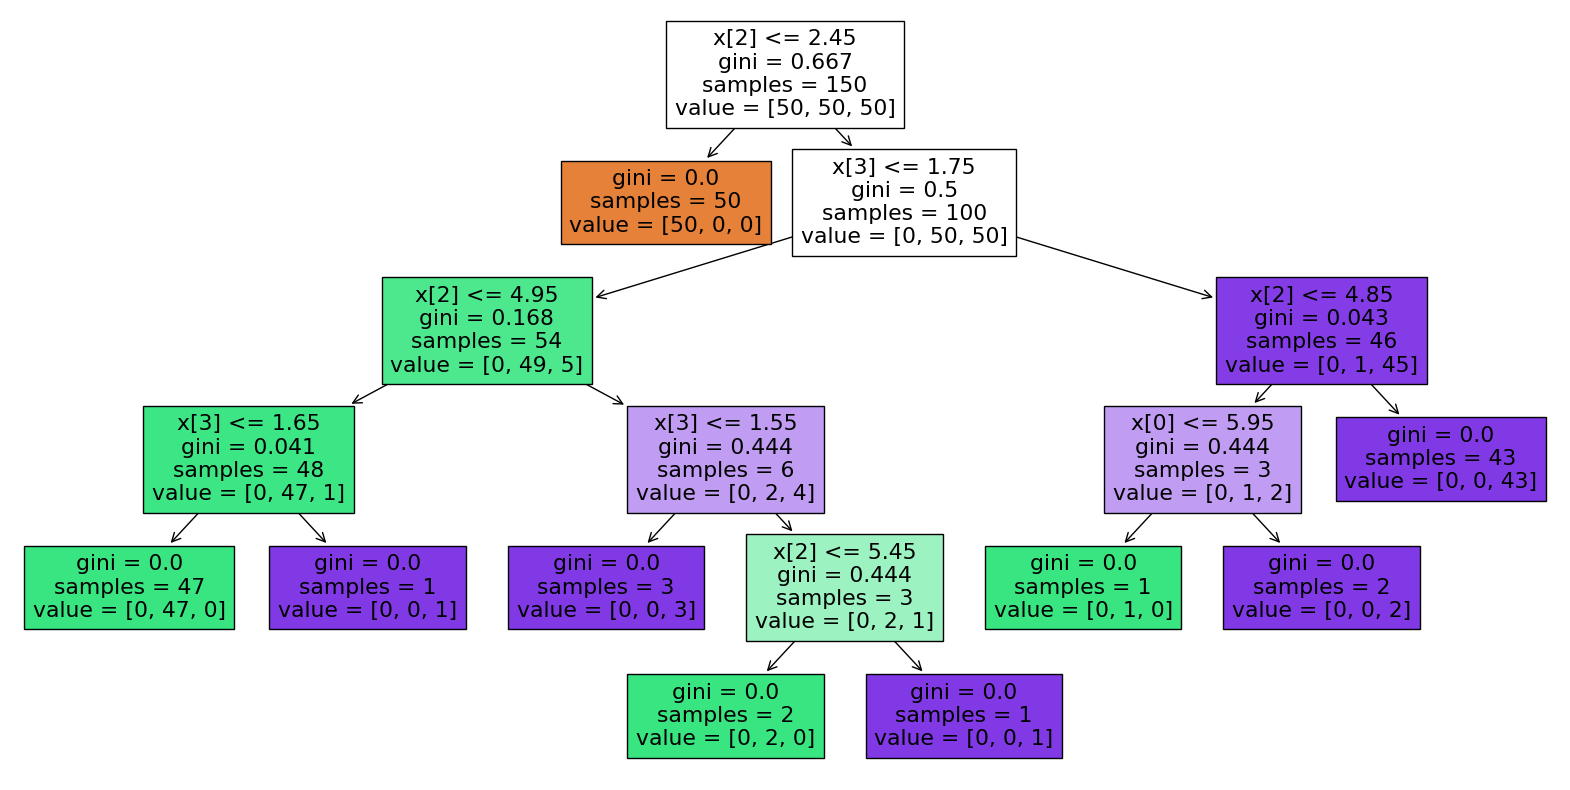

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

t = tree.plot_tree(clf.fit(X,y), filled=True)

## Pima Indians Diabets practice

### 1. 데이터 구성 확인
- Pregnancies: 임신 횟수
- Glucose: 2시간 동안 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure: 이완기 혈압(mm Hg)
- SkinThckness:삼두근 피부 주름 두께(mm), 체지방을 추정하는데 사용되는 값
- Insulin: 2시간 혈청 인슐링(mu U/ml)
- BMI:체질량 지수(weight / height^2)
- DiabetesPedigressFunction:당노병 혈통 기능
- Age:나이
- Outcome: 768개 중 268개결과 클래스가 1(당뇨병)이고 나머지는 0(당뇨병x) 

### 2. 필요한 라이브러리 로드

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3. 데이터셋 로드

In [38]:
df = pd.read_csv('data/diabetes.csv')
df.shape  # (768, 9)

(768, 9)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.info()  # 모두 숫자형(int64, float64)이며, 결측값은 없음
# 전처리가 필요하지 않은 상황

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 4. 학습, 예측 데이터셋 나누기

In [44]:
# hold-out을 진행하고자 하며, 비율은 8:2로 예정
# 전체 데이터 행에서 80%위치에 해당하는 값을 구해 split_count변수에 담기

split_count = int(df.shape[0] * 0.8)

split_count  # 614

614

In [51]:
# train, test로 데이터 슬리이싱을 통해 데이터 분할
train = df[:split_count].copy()  # 0~613번 인덱스까지의 데이터를 포함, 전체의 80%, .copy()를 통해 깊은 복사
test = df[split_count:].copy()  # 614번 인덱스부터 끝까지 데이터를 포함, 전체의 20% , .copy()를 통해 깊은 복사

In [54]:
train.shape  # (614, 9)
test.shape  #(154, 9)

(154, 9)

### 5. 종속, 독립변수 컬럼 구분

In [73]:
# feature_names에 종속변수 컬럼명을 저장

feature_names = train.columns[:-1].to_list()
feature_names  # 종속변수만 저장됨

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [76]:
# 독립변수를 label에 저장
label = train.columns[-1]
label

'Outcome'

### 6. 학습, 예측 데이터셋 만들기

In [80]:
# train set 만들기
X_train = train[feature_names]  # 종속변수만 표현됨
X_train.shape  #(614, 8)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [85]:
# target set 만들기
y_train = train[label]
y_train.shape  # (614,) # X와 y의 데이터 행의 수가 같아야함!
y_train.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [88]:
# 예측에 사용할 test 데이터의 종속변수, 독립변수를 구분
X_test = test[feature_names]
y_test = test[label]

print(X_test.shape)  # (154, 8)  # coulmns수가 앞선 X_train의 columns수와 동일해야함
print(X_test.head())
print(y_test.shape)  # (154, )  # row가 X_test와 같아야함
print(y_test.head())


(154, 8)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614           11      138             74             26      144  36.1   
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  
614                     0.557   50  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50  
(154,)
614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64


### 7.  머신러닝 알고리즘 가져오기

In [99]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

### 8. 학습(훈련)

In [103]:
model = model.fit(X_train, y_train)

### 9. 예측

In [109]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### 10. 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다

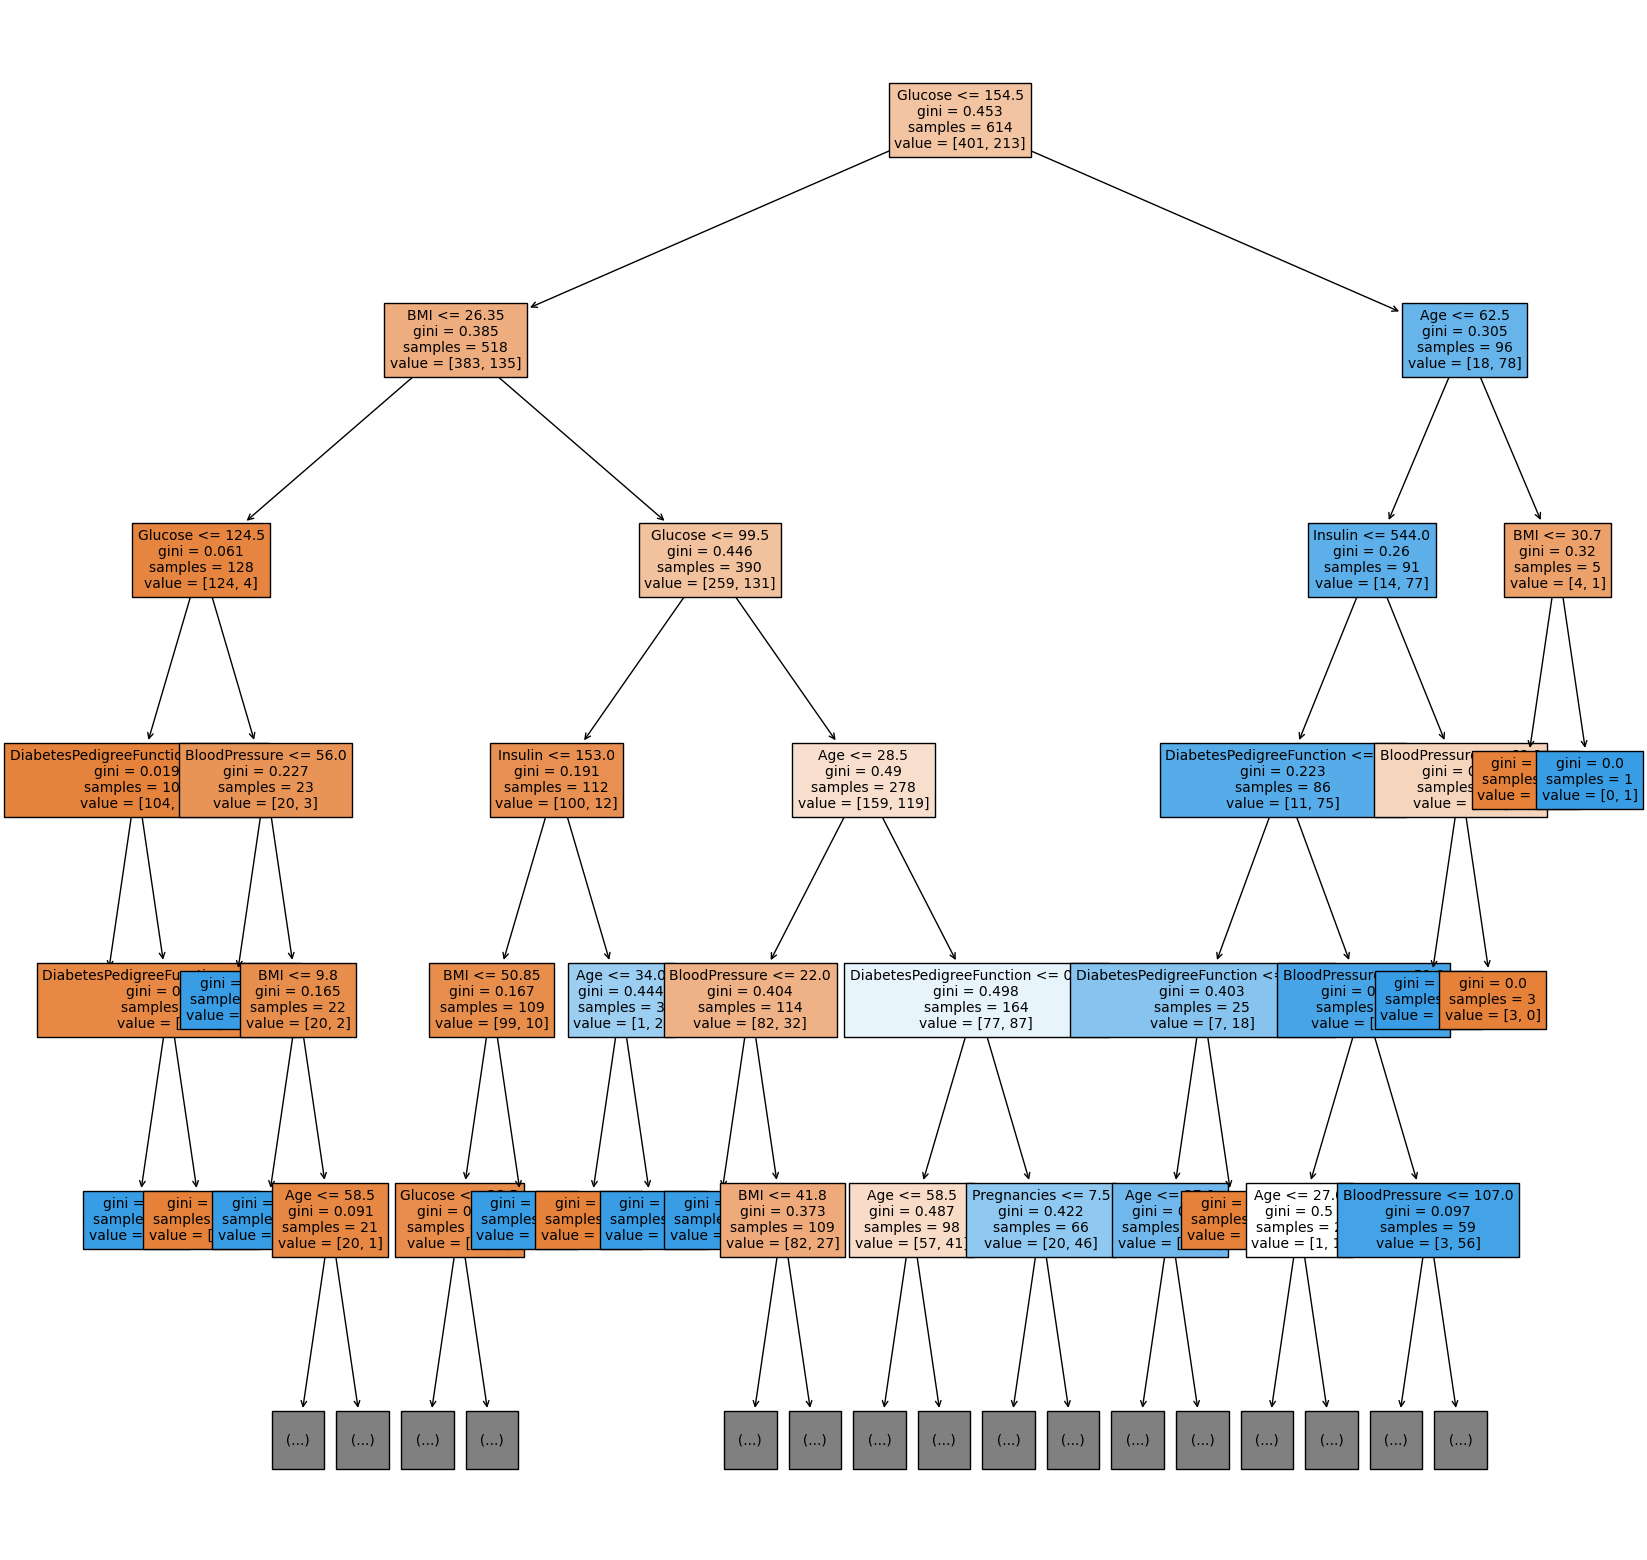

In [117]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))

tree = plot_tree(model,
                 feature_names = feature_names,
                 max_depth=5,
                filled = True,
                fontsize = 10)

In [119]:
# feature 중요도 추출하기
model.feature_importances_

array([0.05776437, 0.31678882, 0.12476421, 0.03056636, 0.06908679,
       0.17378763, 0.11399024, 0.11325158])

<Axes: >

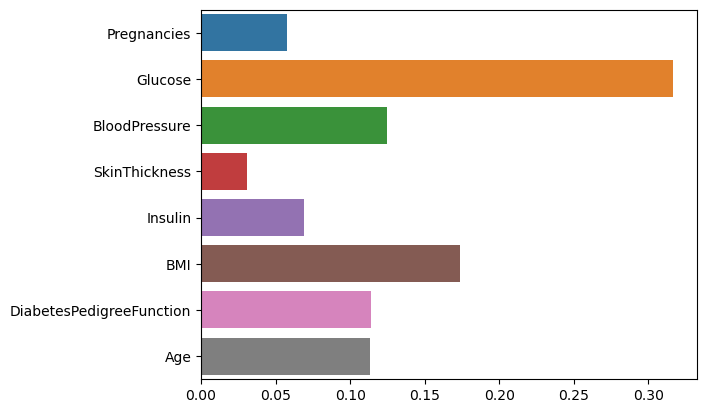

In [122]:
# feature importance make it graph
sns.barplot(x = model.feature_importances_, y = feature_names)

<Axes: >

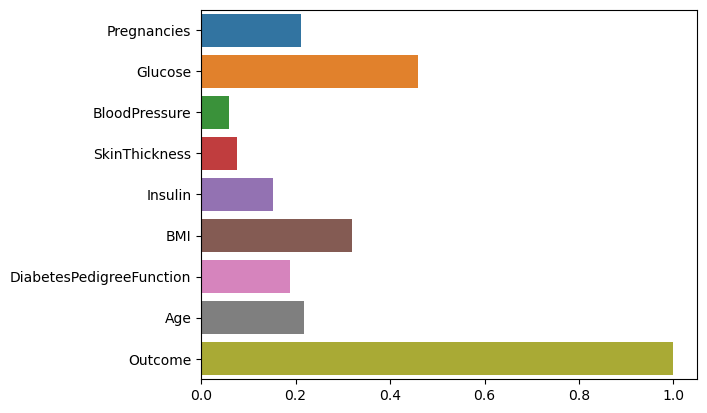

In [140]:
# correlation으로 그리기 

corr_y = train.corr()['Outcome'].index
corr_x = train.corr()['Outcome'].values

corr_y
sns.barplot(x=corr_x, y = corr_y)

### 11. 정확도 측정하기

In [146]:
# 실제값 - 예측값을 빼주면 같은값은 0으로 나옴
# 여기서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됨

acc = 1 - abs(y_test - y_predict).sum() / len(y_test)
diff_count = abs(y_test - y_predict).sum()
diff_count

45

In [150]:
# 정확도 구하기 
((len(y_test)-diff_count) / len(y_test))*100 # 70.78%

70.77922077922078

In [153]:
# sklearn 모듈 이용해서 정확도 측정하기 
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predict) * 100
acc

70.77922077922078

In [154]:
# model에서 score 바로 계산하기 
model.score(X_test, y_test)

0.7077922077922078